# Cab Data Analysis, Visualization and Dynamic Price Estimation Project

## Preparing the datasets

### Importing Libraries and Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

import warnings 
warnings.filterwarnings('ignore')

In [98]:
city=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\City.csv")

In [99]:
customer=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Customer_ID.csv")

In [100]:
taxi=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Taxi_Data.csv")

In [101]:
transaction=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Transaction_ID.csv")

In [102]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [103]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [104]:
taxi.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [105]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [106]:
taxi['Date of Travel']

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
359387    43108
359388    43104
359389    43105
359390    43105
359391    43102
Name: Date of Travel, Length: 359392, dtype: int64

**Solving the issue with the date column**

In [107]:
taxi['Date of Travel']=pd.to_datetime('1899-12-30') + pd.to_timedelta(taxi['Date of Travel'], unit='D')

In [108]:
sets={'taxi':taxi,
'transaction':transaction,
'city':city,
'customer':customer}

**Checking the shape of all the datasets**

In [109]:
for key,value in sets.items():
    print(f"{key}: {value.shape[0]}")

taxi: 359392
transaction: 440098
city: 20
customer: 49171


**Checking the duplicate values of the datasets**

In [110]:
for key,value in sets.items():
    print(f"{key}: {value.duplicated().sum()}")

taxi: 0
transaction: 0
city: 0
customer: 0


**There seems to have a issue with the data**

In [111]:
print("Unique transaction IDs in taxi:", taxi['Transaction ID'].nunique())
print("Unique transaction IDs in transaction:", transaction['Transaction ID'].nunique())

Unique transaction IDs in taxi: 359392
Unique transaction IDs in transaction: 440098


In [112]:
extra_in_transaction = set(transaction['Transaction ID']) - set(taxi['Transaction ID'])
print("Transaction IDs in `transaction` but NOT in `taxi`:", len(extra_in_transaction))

Transaction IDs in `transaction` but NOT in `taxi`: 80706


In [113]:
extra_in_taxi = set(taxi['Transaction ID']) - set(transaction['Transaction ID'])
print("Transaction IDs in `taxi` but NOT in `transaction`:", len(extra_in_taxi))

Transaction IDs in `taxi` but NOT in `transaction`: 0


In [114]:
list(extra_in_transaction)[:10]  # preview 10 IDs

[10055975,
 10055976,
 10055977,
 10055978,
 10055979,
 10055980,
 10055981,
 10055982,
 10055983,
 10055984]

In [115]:
transaction[transaction['Transaction ID']==10055975]

,Transaction ID,Customer ID,Payment_Mode
55964,10055975,44860,Card


In [116]:
taxi[taxi['Transaction ID']==10055975]

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip


As we can see there is some issue with the data, there are transactions, but no details about rides...maybe that is a data consistency issue

transaction.transactionID -> taxi.transactionID

transaction.customerID -> customer.customerID

**Merging the data so that there is only 1 main data source file**

In [117]:
temp_data_1=pd.merge(taxi,transaction,on='Transaction ID',how='left')

In [118]:
temp_data_1.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [119]:
taxi.shape

(359392, 7)

In [120]:
transaction.shape

(440098, 3)

In [121]:
temp_data_1.shape

(359392, 9)

In [122]:
temp_data_1.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
Distance Travelled(KM)    0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
dtype: int64

In [123]:
data=pd.merge(temp_data_1,customer,on='Customer ID',how='left')

In [124]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [125]:
data.shape

(359392, 12)

In [126]:
data.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
Distance Travelled(KM)    0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
dtype: int64

### Basic analysis of city data, as it will not be used in our original data

In [127]:
city.shape

(20, 3)

In [128]:
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [129]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [130]:
city['Population']=city['Population'].str.replace(",","").astype(int)
city['Users']=city['Users'].str.replace(",","").astype(int)

In [131]:
city[['City','Users']].sort_values(by='Users',ascending=False).head(3)

,City,Users
0,NEW YORK NY,302149
14,SAN FRANCISCO CA,213609
1,CHICAGO IL,164468


<Axes: ylabel='City'>

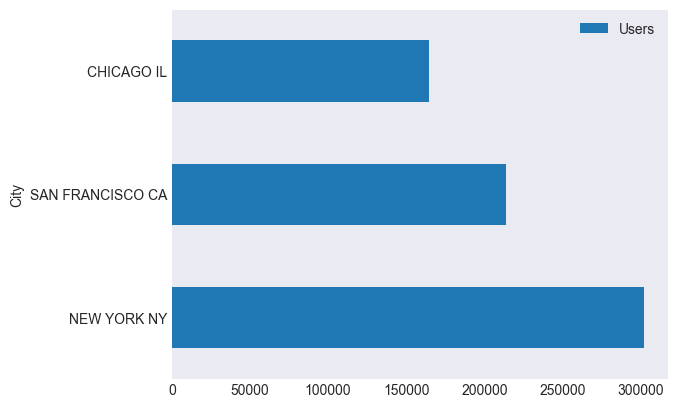

In [132]:
city[['City','Users']].sort_values(by='Users',ascending=False).head(3).set_index('City').plot(kind='barh')

These are the top 3 cities with the most users

In [133]:
city['percent user city']=round(city['Users']/city['Population']*100,2)

In [134]:
city[['City','percent user city']].sort_values(by='percent user city',ascending=False).head(3)

,City,percent user city
14,SAN FRANCISCO CA,33.93
19,BOSTON MA,32.14
17,WASHINGTON DC,30.32


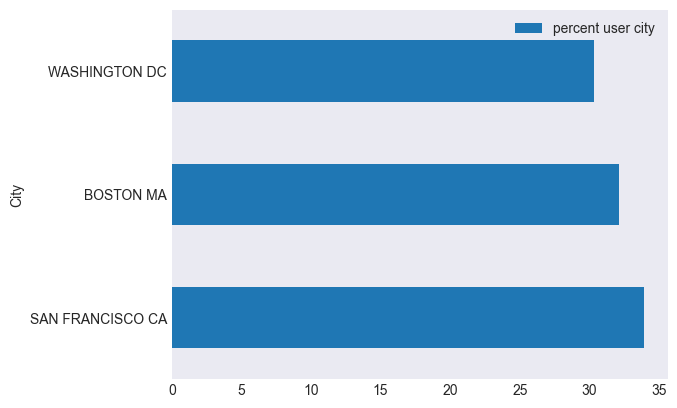

In [135]:
city[['City','percent user city']].sort_values(by='percent user city',ascending=False).head(3).set_index('City').plot(kind='barh')
plt.show()

As we can see, most of the users are from NYC,San Francisco and Chicago...but that is becuase the population of those cities are the highest, but if we follow the actual proportion and users, we can say that San Francisco, Boston and Washington DC have the highest user base relative to their population

- So the Engagement rate is the highest in **San Francisco, Boston and Washington DC**

### Basic information about the data

In [136]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction ID          359392 non-null  int64         
 1   Date of Travel          359392 non-null  datetime64[ns]
 2   Company                 359392 non-null  object        
 3   City                    359392 non-null  object        
 4   Distance Travelled(KM)  359392 non-null  float64       
 5   Price Charged           359392 non-null  float64       
 6   Cost of Trip            359392 non-null  float64       
 7   Customer ID             359392 non-null  int64         
 8   Payment_Mode            359392 non-null  object        
 9   Gender                  359392 non-null  object        
 10  Age                     359392 non-null  int64         
 11  Income (USD/Month)      359392 non-null  int64         
dtypes: datetime64[ns](1), float64(

In [138]:
data.duplicated().sum()

0

In [139]:
data.describe(include='object')

,Company,City,Payment_Mode,Gender
count,359392,359392,359392,359392
unique,2,19,2,2
top,Yellow Cab,NEW YORK NY,Card,Male
freq,274681,99885,215504,205912


In [140]:
data.describe(include='number')

,Transaction ID,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [141]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


### Some feature engineering before starting the analysis of the data

In [142]:
data.columns=data.columns.str.lower()

In [143]:
data.rename(columns={'date of travel':'date','distance travelled(km)':'distance','price charged':'price','cost of trip':'cost',
'payment_mode':'payment mode','income (usd/month)':'income'},inplace=True)

In [144]:
data.head()

,transaction id,date,company,city,distance,price,cost,customer id,payment mode,gender,age,income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction id  359392 non-null  int64         
 1   date            359392 non-null  datetime64[ns]
 2   company         359392 non-null  object        
 3   city            359392 non-null  object        
 4   distance        359392 non-null  float64       
 5   price           359392 non-null  float64       
 6   cost            359392 non-null  float64       
 7   customer id     359392 non-null  int64         
 8   payment mode    359392 non-null  object        
 9   gender          359392 non-null  object        
 10  age             359392 non-null  int64         
 11  income          359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 32.9+ MB


In [146]:
data['transaction id']=data['transaction id'].astype(str)

In [147]:
data['customer id']=data['customer id'].astype(str)

In [148]:
data['year']=data['date'].dt.year

In [149]:
data['month']=data['date'].dt.month

In [150]:
data['day']=data['date'].dt.day

In [151]:
data['day name']=data['date'].dt.day_name()

In [152]:
data.head()

,transaction id,date,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday


In [153]:
data.drop(columns=['date','transaction id'],inplace=True)

In [154]:
data.head()

,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name
0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday
1,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday
2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday
3,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday
4,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday


In [155]:
data['company']=data['company'].str.replace('Cab',"")

In [156]:
data['city'].value_counts()

city
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [157]:
# Only split if last part is a valid US state abbreviation
us_states = set(['NY', 'IL', 'CA', 'DC', 'MA', 'WA', 'TX', 'AZ', 'PA', 'FL', 'GA', 'CO', 'TN'])

def smart_split(location):
    parts = location.rsplit(' ', 1)
    if len(parts) == 2 and parts[1] in us_states:
        return pd.Series({'city': parts[0], 'state': parts[1]})
    else:
        return pd.Series({'city': location, 'state': 'N/A'})

In [158]:
data[['city', 'state']] = data['city'].apply(smart_split)

In [159]:
data['state'].isnull().sum()

0

In [160]:
data['city'].value_counts()

city
NEW YORK          99885
CHICAGO           56625
LOS ANGELES       48033
WASHINGTON        43737
BOSTON            29692
SAN DIEGO         20488
SILICON VALLEY     8519
SEATTLE            7997
ATLANTA            7557
DALLAS             7017
MIAMI              6454
AUSTIN             4896
ORANGE COUNTY      3982
DENVER             3825
NASHVILLE          3010
SACRAMENTO         2367
PHOENIX            2064
TUCSON             1931
PITTSBURGH         1313
Name: count, dtype: int64

In [161]:
data['state'].value_counts()

state
NY     99885
CA     70888
IL     56625
DC     43737
MA     29692
N/A    12501
TX     11913
WA      7997
GA      7557
FL      6454
AZ      3995
CO      3825
TN      3010
PA      1313
Name: count, dtype: int64

In [162]:
data.head()

,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name,state
0,Pink,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday,GA
1,Pink,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday,GA
2,Pink,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday,GA
3,Pink,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday,GA
4,Pink,ATLANTA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday,GA


## Analysis of the data

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   company       359392 non-null  object 
 1   city          359392 non-null  object 
 2   distance      359392 non-null  float64
 3   price         359392 non-null  float64
 4   cost          359392 non-null  float64
 5   customer id   359392 non-null  object 
 6   payment mode  359392 non-null  object 
 7   gender        359392 non-null  object 
 8   age           359392 non-null  int64  
 9   income        359392 non-null  int64  
 10  year          359392 non-null  int32  
 11  month         359392 non-null  int32  
 12  day           359392 non-null  int32  
 13  day name      359392 non-null  object 
 14  state         359392 non-null  object 
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 37.0+ MB


### Univariate Analysis

**Customer ID**

In [164]:
data['customer id'].nunique()

46148

`There are 46418 uniqe customers using these servcices`

In [165]:
data['customer id'].value_counts().head(10)

customer id
494     54
2939    53
2766    51
1070    51
858     50
1067    50
1628    50
1803    50
944     50
903     50
Name: count, dtype: int64

`These are the top 10 most frequent customers`

**Company**

In [166]:
data['company'].value_counts(normalize=True)*100

company
Yellow     76.429358
Pink       23.570642
Name: proportion, dtype: float64

`Yellow is capturing 76% of the share of the transaction`

**City**

In [167]:
(data['city'].value_counts(normalize=True)*100).head(5)

city
NEW YORK       27.792772
CHICAGO        15.755776
LOS ANGELES    13.365072
WASHINGTON     12.169720
BOSTON          8.261731
Name: proportion, dtype: float64

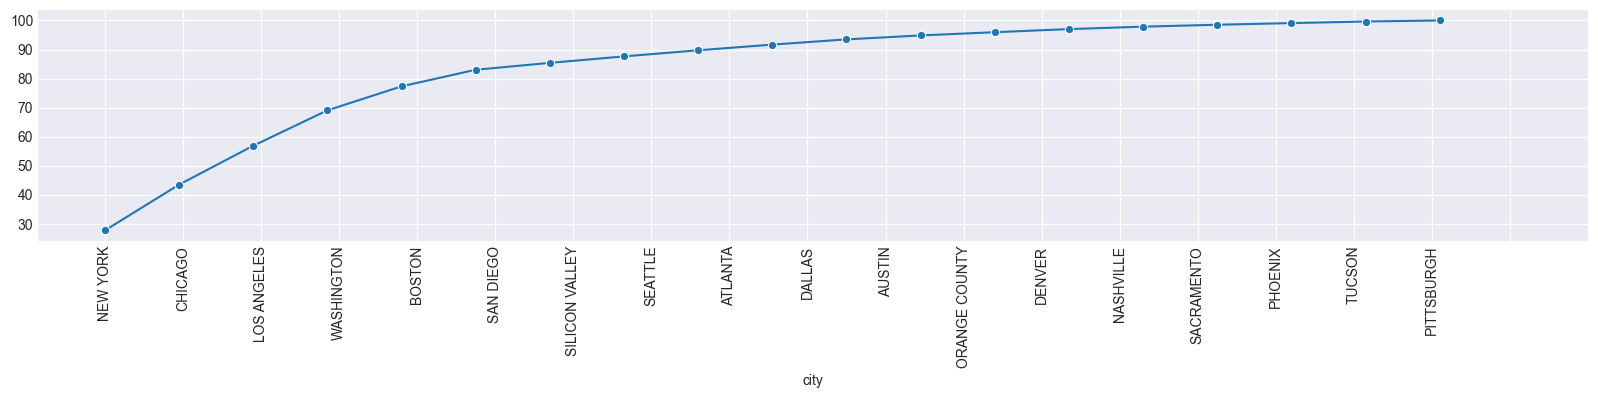

In [168]:
city_percent=data['city'].value_counts(normalize=True)*100
plt.figure(figsize=(20,3))
sns.lineplot(x=np.cumsum(city_percent).index, y=np.cumsum(city_percent).values, marker='o')
plt.xticks(np.linspace(0,20,20),rotation=90)
plt.grid("-")
plt.show()

`As we can see 5 of the cities are controlling approx 80% of the total transactions`

**Distance**

In [169]:
data['distance'].describe()

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: distance, dtype: float64

<Axes: xlabel='distance', ylabel='Density'>

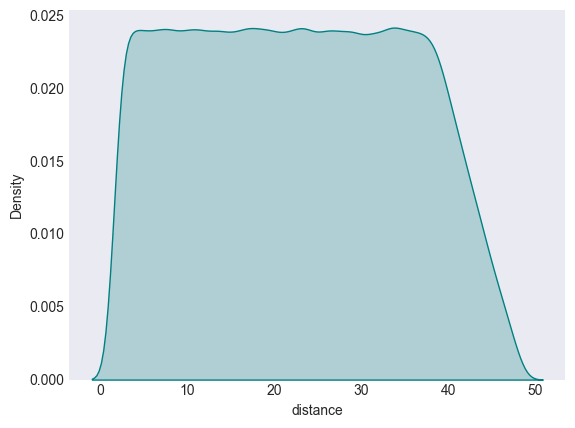

In [170]:
sns.kdeplot(data['distance'],fill=True,color='teal')

<Axes: xlabel='distance', ylabel='Count'>

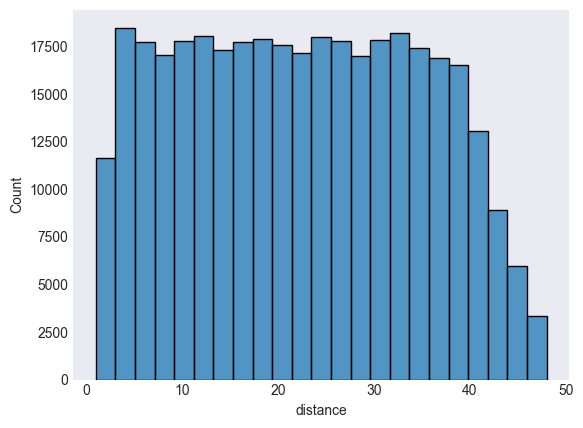

In [171]:
sns.histplot(data['distance'],bins=np.linspace(1,48,24))

<Axes: ylabel='distance'>

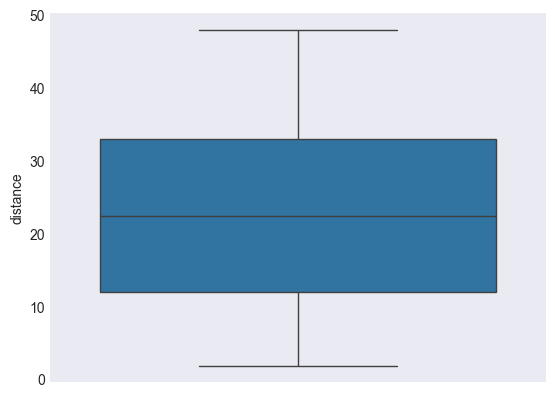

In [172]:
sns.boxplot(data['distance'])

`People tend to use cab service for even smaller distances too...but use less times if the distance is long`

**Price**

In [173]:
data['price'].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

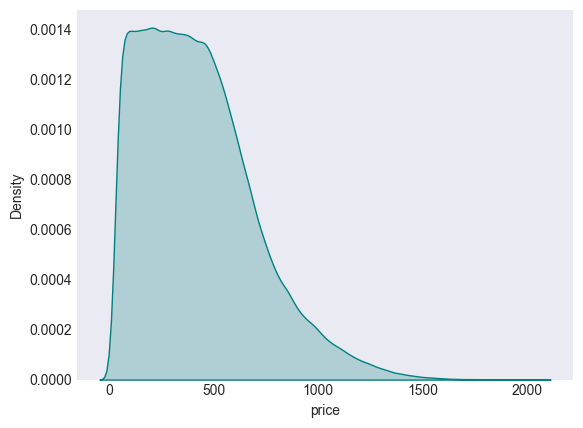

In [174]:
sns.kdeplot(data['price'],fill=True,color='teal')

<Axes: xlabel='price', ylabel='Count'>

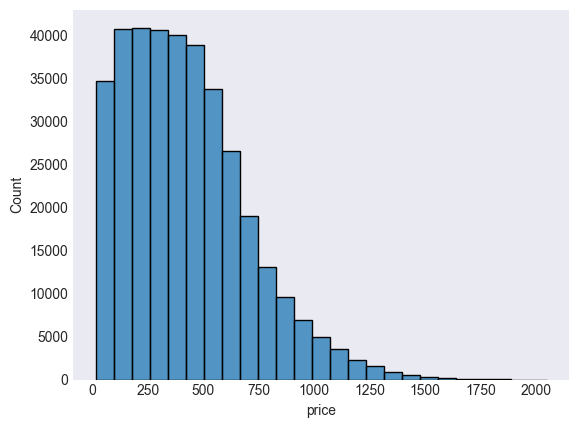

In [175]:
sns.histplot(data['price'],bins=25)

<Axes: ylabel='price'>

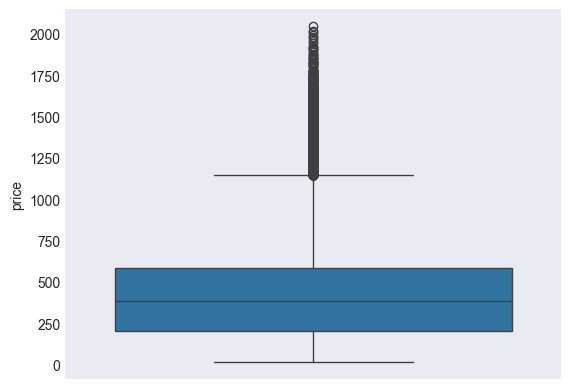

In [176]:
sns.boxplot(data['price'])

`Most of the price range is in less or middle range...so we can say that this was a budget service`

**Cost**

In [177]:
data['cost'].describe()

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: cost, dtype: float64

<Axes: xlabel='cost', ylabel='Density'>

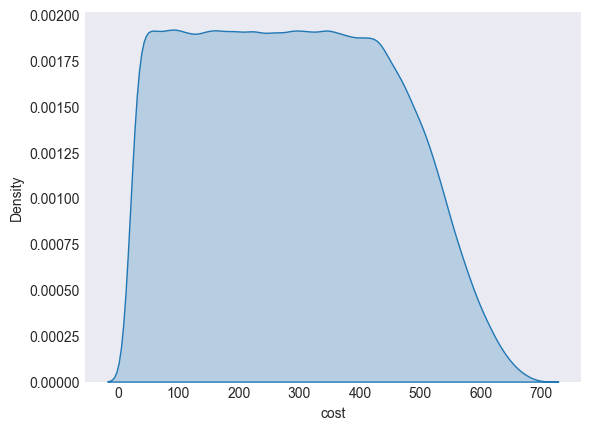

In [178]:
sns.kdeplot(data['cost'],fill=True)

**Payment Mode**

In [179]:
data['payment mode'].value_counts(normalize=True)*100

payment mode
Card    59.963494
Cash    40.036506
Name: proportion, dtype: float64

**Gender**

In [180]:
data['gender'].value_counts(normalize=True)*100

gender
Male      57.294542
Female    42.705458
Name: proportion, dtype: float64

**Age**

In [181]:
data['age'].describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

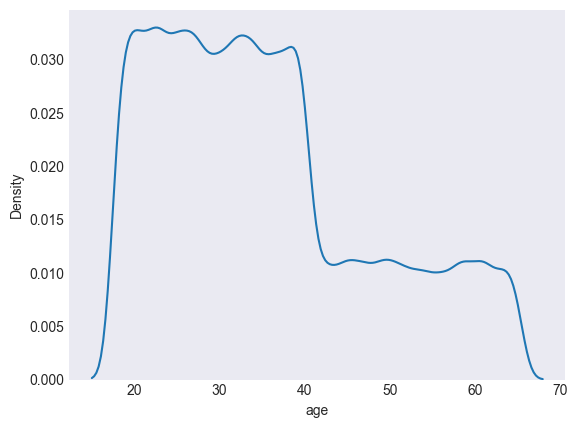

In [182]:
sns.kdeplot(data['age'])

`People after the age 40 is using this service less`

**Income**

In [183]:
data['income'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Density'>

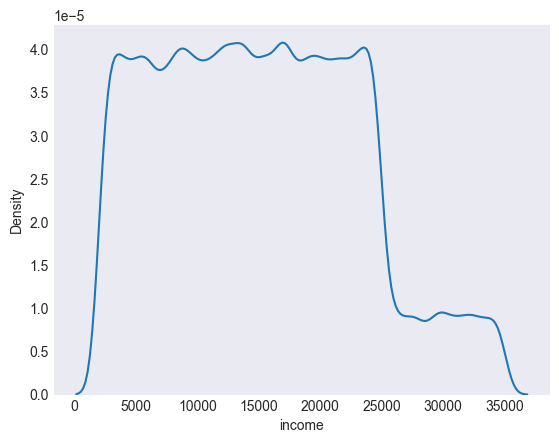

In [184]:
sns.kdeplot(data['income'])

`There are fewer people who have salary more than 25000`

**Year**

In [185]:
data['year'].value_counts()

year
2017    128510
2018    123563
2016    107319
Name: count, dtype: int64

**Month**

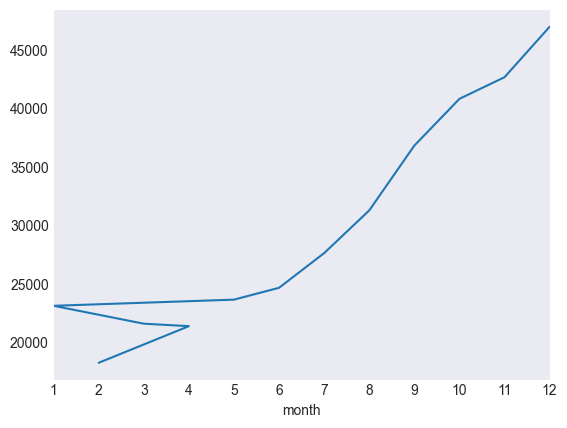

In [186]:
data['month'].value_counts().plot(kind='line')
plt.xlim(1,12)
plt.xticks(np.linspace(1,12,12))
plt.show()

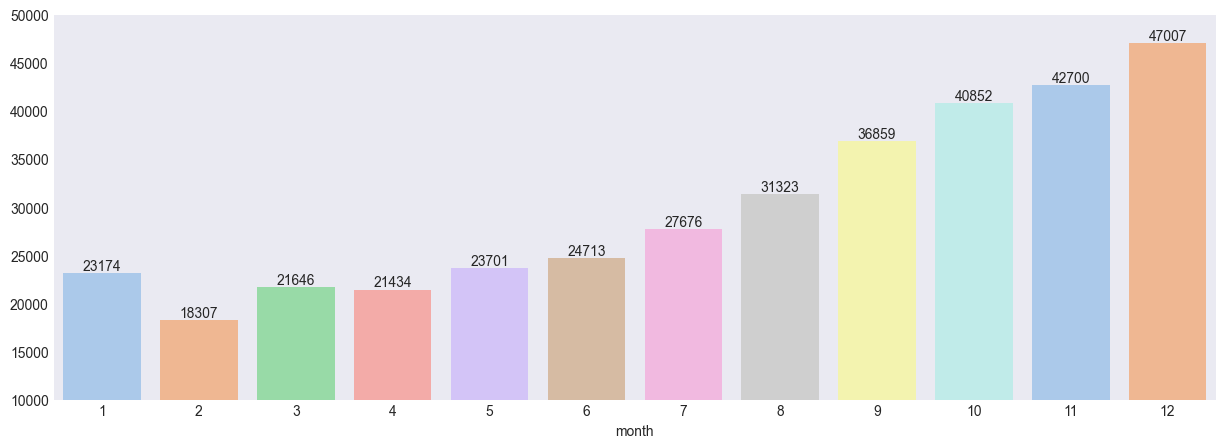

In [187]:
month_count=data['month'].value_counts()
plt.figure(figsize=(15,5))
ax=sns.barplot(x=month_count.index,y=month_count.values,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(10000,50000)
plt.show()


`Usage highly increases after the first half of the year`

**Day**

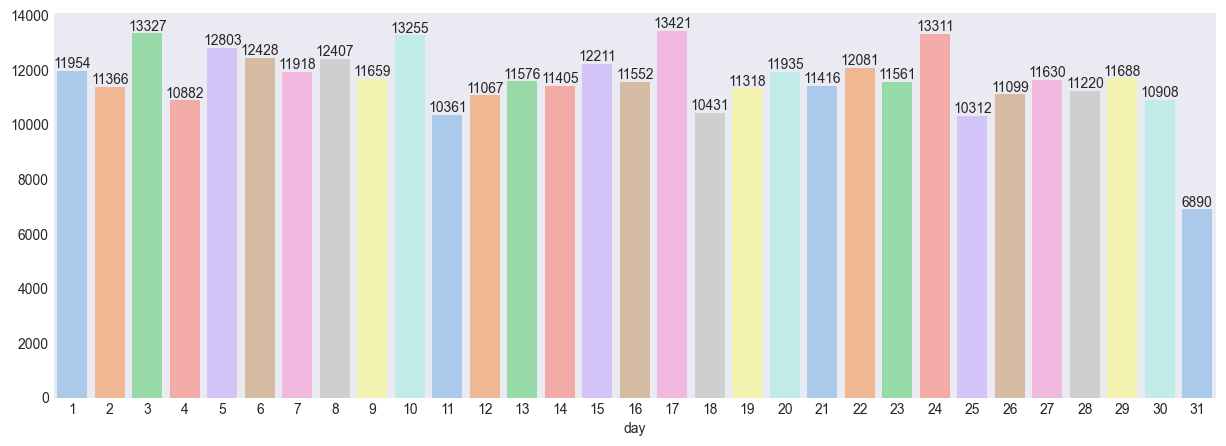

In [188]:
day_count=data['day'].value_counts()
plt.figure(figsize=(15,5))
ax=sns.barplot(x=day_count.index,y=day_count.values,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**Day Name**

<Axes: xlabel='day name'>

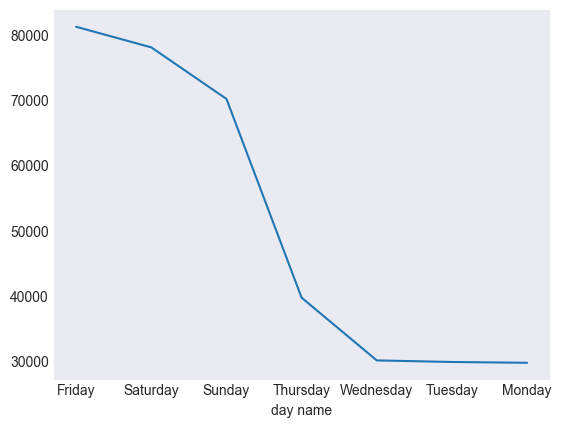

In [189]:
data['day name'].value_counts().plot(kind='line')

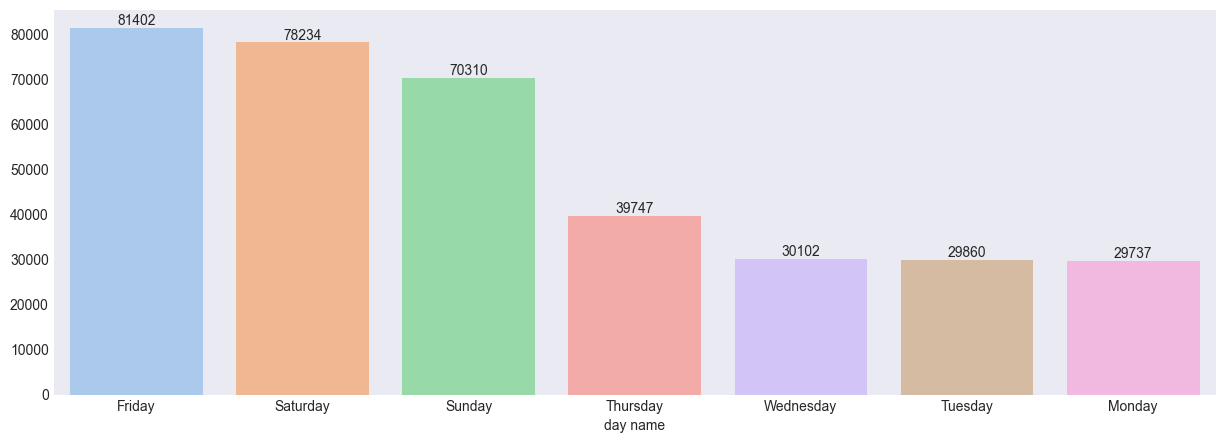

In [190]:
day_name_count=data['day name'].value_counts()
plt.figure(figsize=(15,5))
ax=sns.barplot(x=day_name_count.index,y=day_name_count.values,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

`Usage is Most frequent in weekends`

**State**

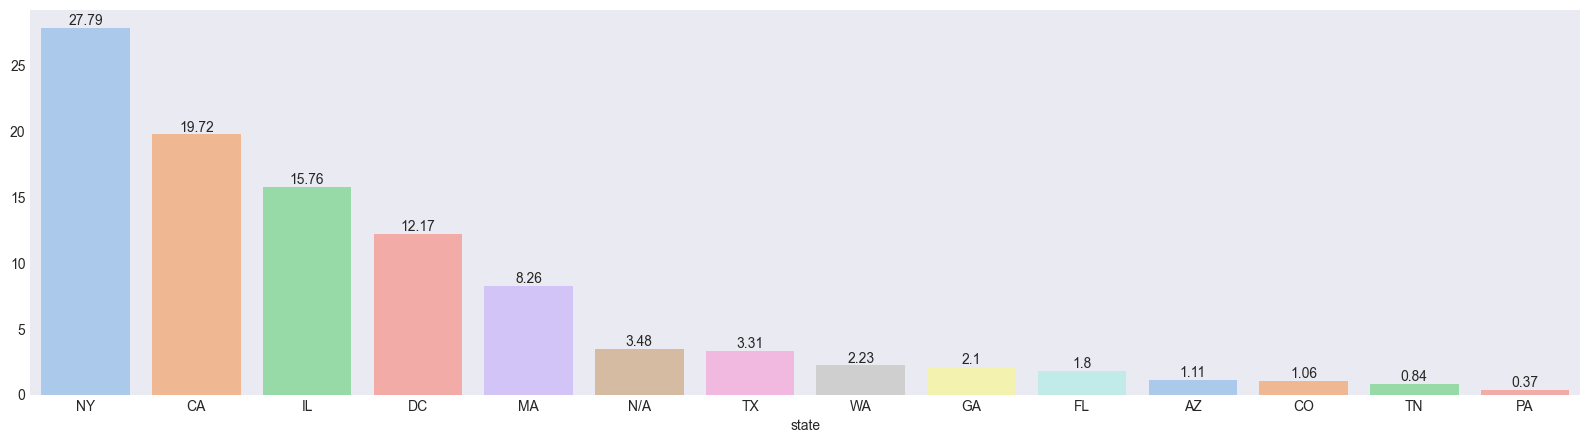

In [192]:
state_count=(data['state'].value_counts(normalize=True)*100).round(2)
plt.figure(figsize=(20,5))
ax=sns.barplot(x=state_count.index,y=state_count.values,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

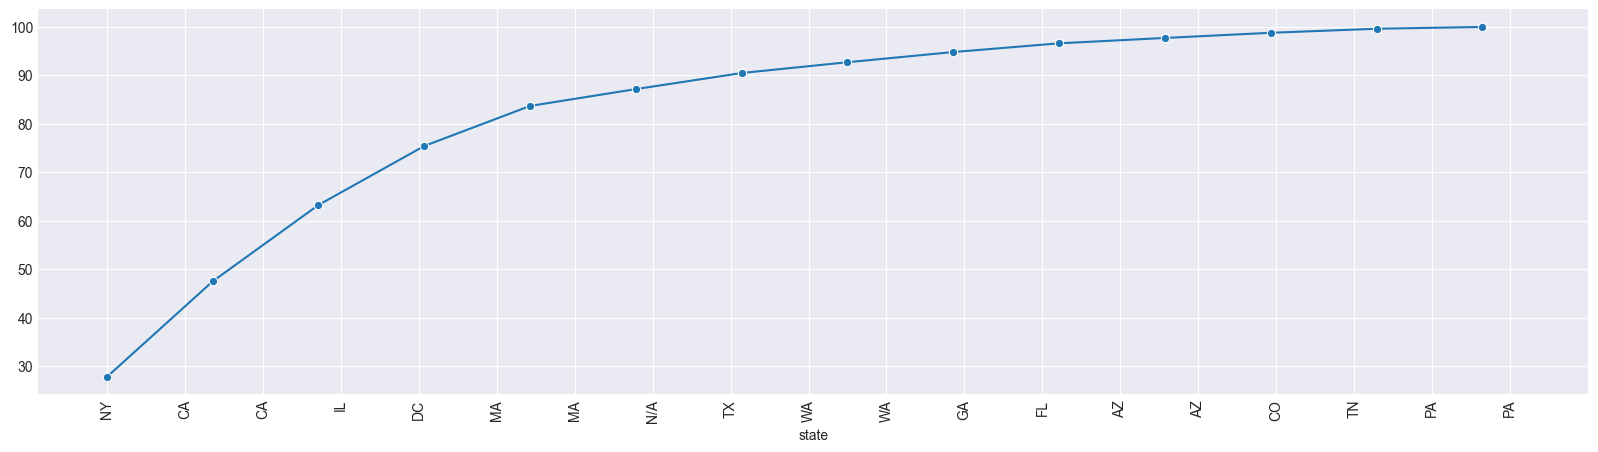

In [193]:
state_percent=data['state'].value_counts(normalize=True)*100
plt.figure(figsize=(20,5))
sns.lineplot(x=np.cumsum(state_percent).index, y=np.cumsum(state_percent).values, marker='o')
plt.xticks(np.linspace(0,14,20),rotation=90)
plt.grid("-")
plt.show()

`Top 5 states have captured 80% of the rides`

### BI variate analysis with the price columns, as this is our project goal

**Time Analysis**

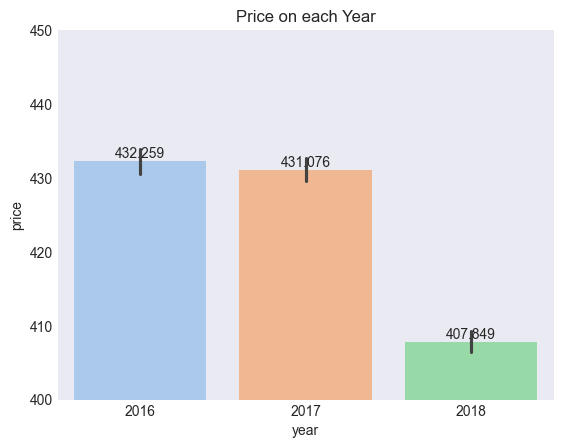

In [195]:
ax=sns.barplot(x='year',y='price',data=data,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Price on each Year')
plt.ylim(400,450)
plt.show()

`As we can see, the sales in this year have reduced compare to previous years`

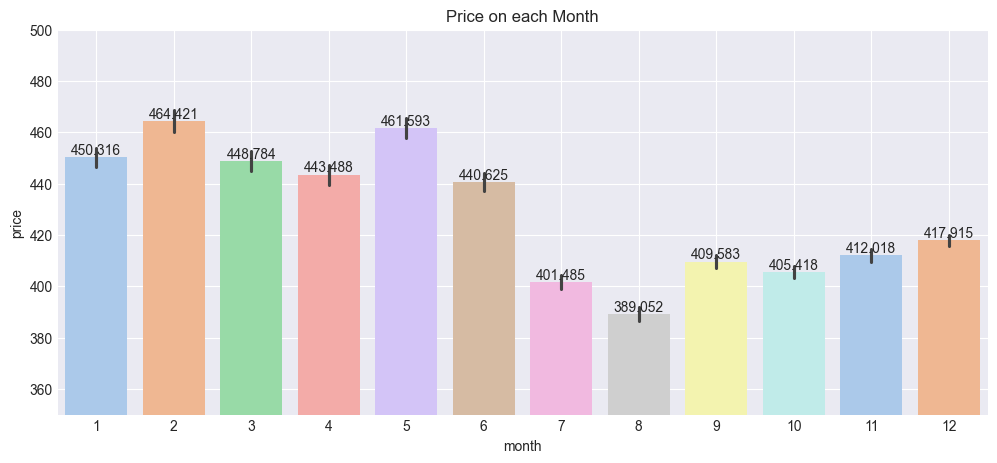

In [196]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='month',y='price',data=data,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Price on each Month')
plt.grid("-")
plt.ylim(350,500)
plt.show()

`Price is relatively higher in starting of year, compared to end of the year`

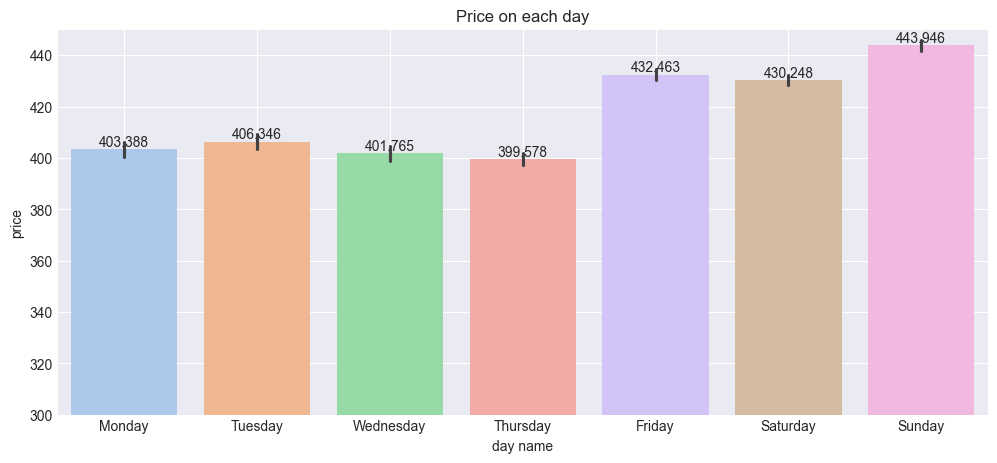

In [197]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,5))
ax=sns.barplot(x='day name',y='price',data=data,palette='pastel',order=day_order)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Price on each day')
plt.grid("-")
plt.ylim(300,450)
plt.show()

`Price is highest in the weekends`

**Company**

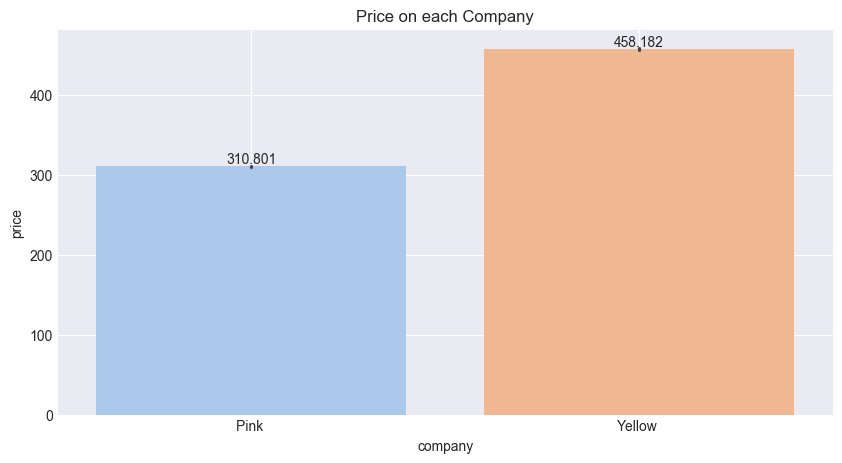

In [198]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='company',y='price',data=data,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Price on each Company')
plt.grid("-")
plt.show()

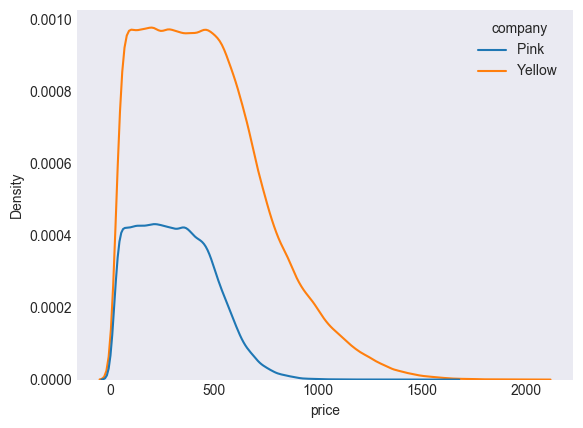

In [199]:
sns.kdeplot(x='price',data=data,hue='company')
plt.show()

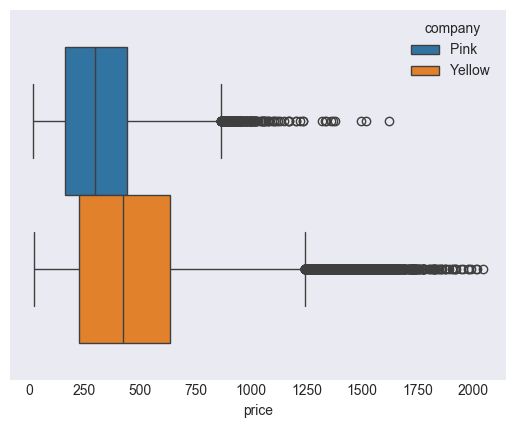

In [200]:
sns.boxplot(x='price',data=data,hue='company')
plt.show()

`Yellow tends to have more extreme prices than Pink`

**City**

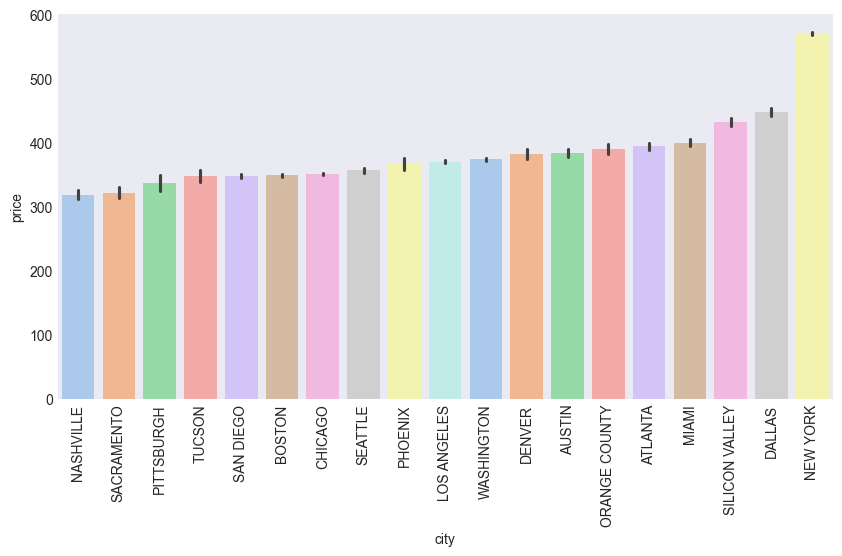

In [206]:
city_order=data.groupby('city')['price'].mean().sort_values().index
plt.figure(figsize=(10,5))
sns.barplot(x='city',y='price',data=data,palette='pastel',order=city_order)
plt.xticks(rotation=90)
plt.show()

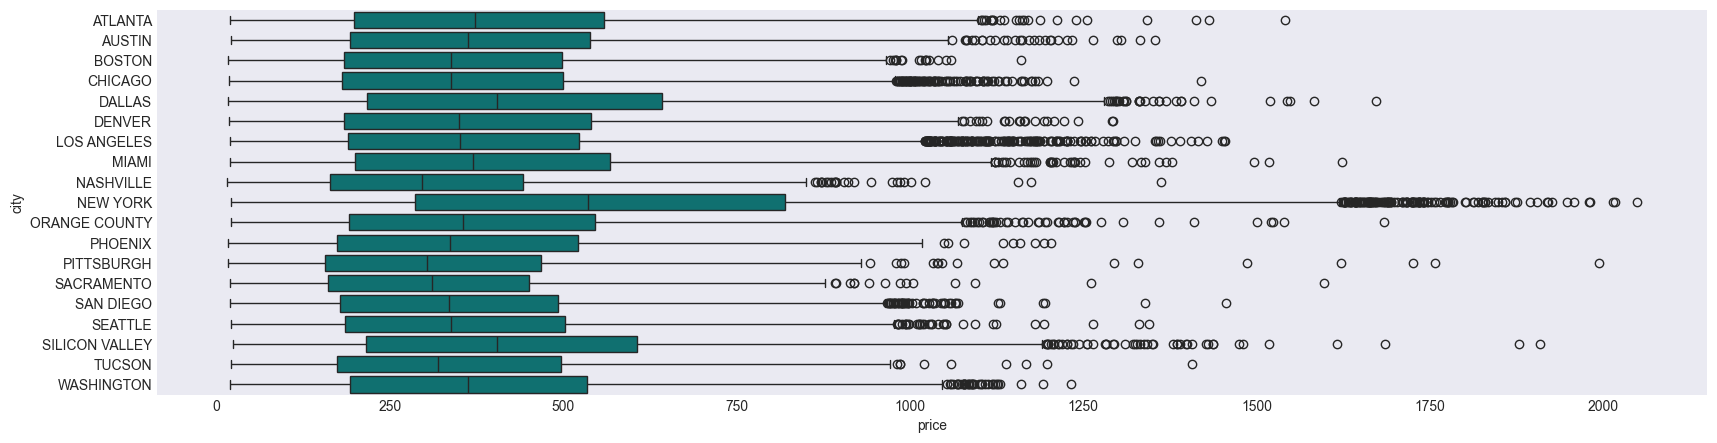

In [209]:
plt.figure(figsize=(20,5))
sns.boxplot(x='price',y='city',data=data,color='teal')
plt.show()

`Most of the  high priced transactions are from new york`

**Distance**

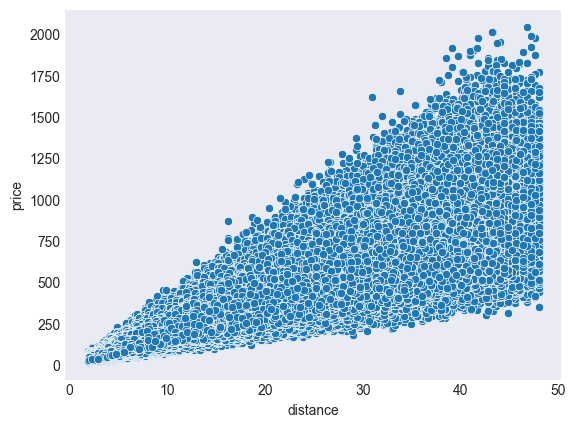

In [219]:
sns.scatterplot(x='distance',y='price',data=data,palette='pastel')
plt.show()

In [220]:
round(data['distance'].corr(data['price']),2)

0.84

`For longer distance price varies more compared to shorter distances, and it has high corelation with price`

**Cost**

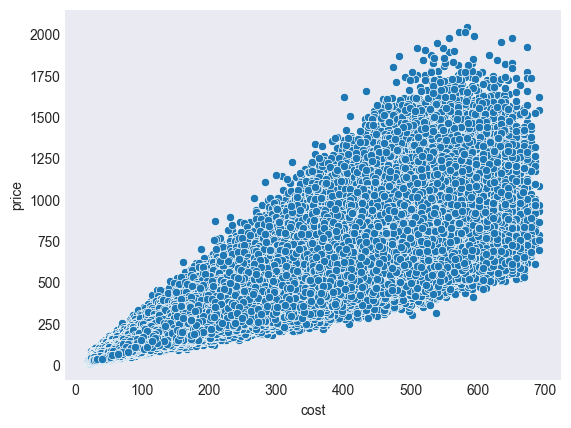

In [211]:
sns.scatterplot(x='cost',y='price',data=data)
plt.show()

In [214]:
round(data['price'].corr(data['cost']),2)

0.86

`The company is not charging unorthodox values, they are pricing based on their costs and it has high corelation with price`

**Payment Mode**

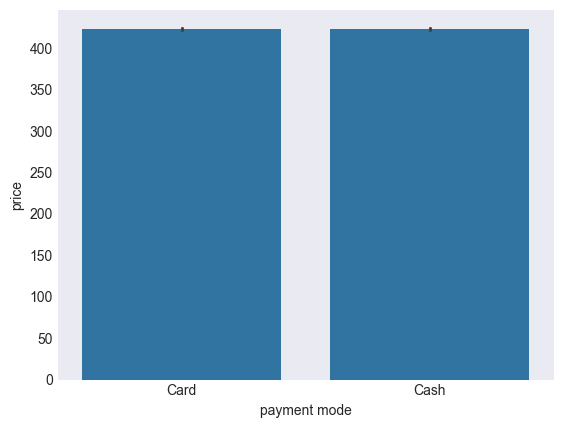

In [216]:
sns.barplot(x='payment mode',y='price',data=data)
plt.show()

**Gender**

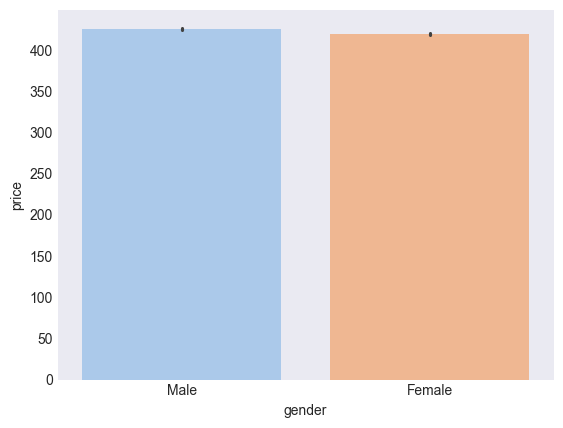

In [218]:
sns.barplot(x='gender',y='price',data=data,palette='pastel')
plt.show()

**Age**

<Axes: xlabel='age', ylabel='price'>

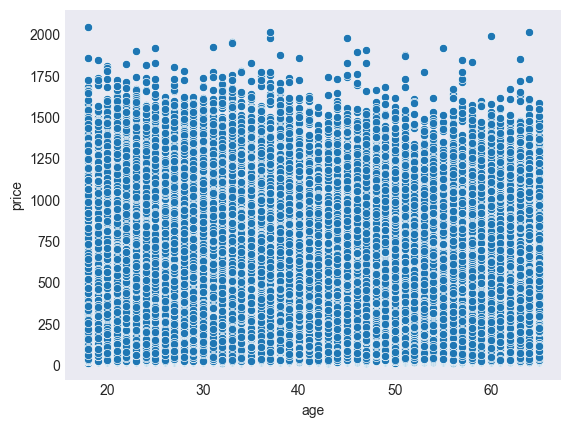

In [221]:
sns.scatterplot(x='age',y='price',data=data)

**Income**

<Axes: xlabel='income', ylabel='price'>

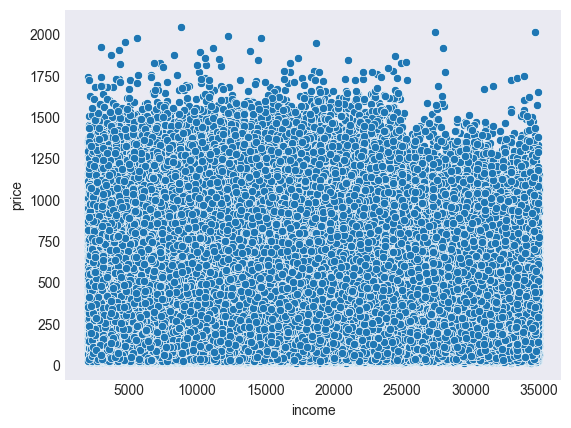

In [222]:
sns.scatterplot(x='income',y='price',data=data)

**State**

<Axes: xlabel='state', ylabel='price'>

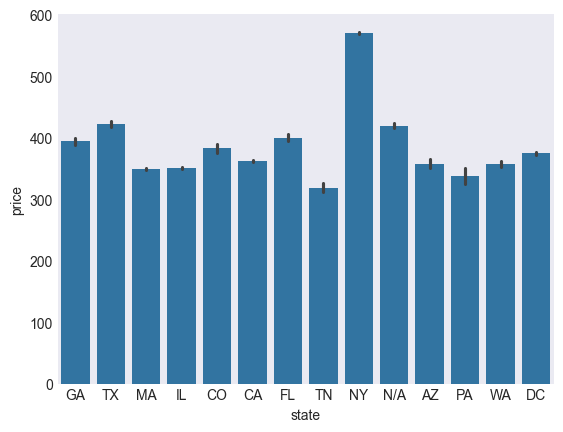

In [223]:
sns.barplot(x='state',y='price',data=data)

### Bivariate analysis with columns other than price column

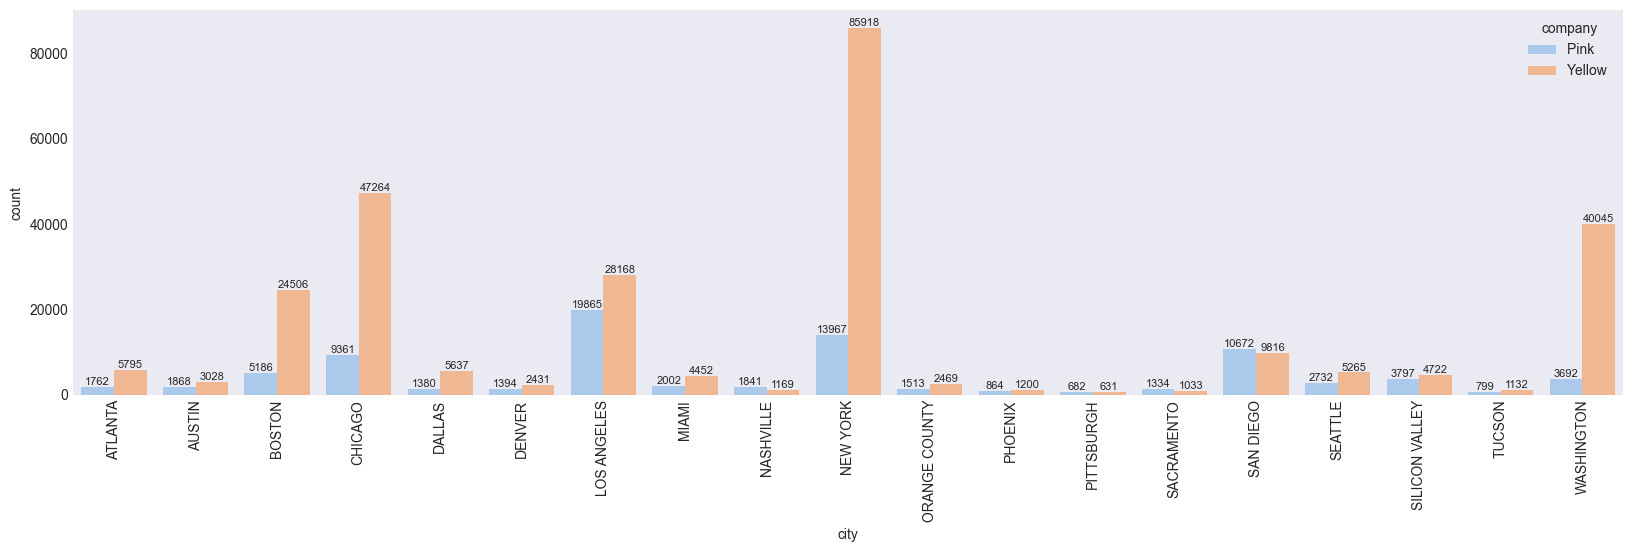

In [235]:
plt.figure(figsize=(20,5))
ax=sns.countplot(x='city',hue='company',data=data,palette='pastel')
for container in ax.containers:
    ax.bar_label(container,fontsize=8)
plt.xticks(rotation=90)
plt.show()

`There are certain cities where yellow taxi is more popular, whereas there are some cities where pink is popular, but in terms of poularity yellow is more popular`

In [238]:
data.groupby('company')['distance'].mean()

company
Pink       22.559917
Yellow     22.569517
Name: distance, dtype: float64

`Both the companies avarage travel distance is same`

In [239]:
data.groupby('company')['cost'].mean()

company
Pink       248.148682
Yellow     297.922004
Name: cost, dtype: float64

`Avarage cost in yellow is higher than pink`

In [240]:
data.groupby('company')['age'].mean()

company
Pink       35.322414
Yellow     35.341112
Name: age, dtype: float64

`There is no specific relation between age and company`

In [246]:
pd.crosstab(data[data['company']=='Yellow ']['company'],data[data['company']=='Yellow ']['gender'])/len(data[data['company']=='Yellow '])

gender,Female,Male
company,,
Yellow,0.422308,0.577692


In [247]:
pd.crosstab(data[data['company']=='Pink ']['company'],data[data['company']=='Pink ']['gender'])/len(data[data['company']=='Pink '])

gender,Female,Male
company,,
Pink,0.442445,0.557555


`There is no specific relation between company and gender`

### Data Preparation and model creation for dynamic price estimation

In [248]:
data.head()

,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name,state
0,Pink,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday,GA
1,Pink,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday,GA
2,Pink,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday,GA
3,Pink,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday,GA
4,Pink,ATLANTA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday,GA


In [249]:
columns_to_remove=['customer id','payment mode','gender','age','income','year','state']

In [250]:
data.drop(columns=columns_to_remove,inplace=True)

In [251]:
data.head()

,company,city,distance,price,cost,month,day,day name
0,Pink,ATLANTA,30.45,370.95,313.635,1,8,Friday
1,Pink,ATLANTA,28.62,358.52,334.854,1,6,Wednesday
2,Pink,ATLANTA,9.04,125.20,97.632,1,2,Saturday
3,Pink,ATLANTA,33.17,377.40,351.602,1,7,Thursday
4,Pink,ATLANTA,8.73,114.62,97.776,1,3,Sunday


In [252]:
data.shape

(359392, 8)

In [258]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

In [254]:
X=data.drop(columns='price')
y=data['price']

In [255]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [256]:
X_train.shape

(287513, 7)

In [257]:
y_train.shape

(287513,)

In [259]:
X_train.head(1)

,company,city,distance,cost,month,day,day name
333706,Yellow,CHICAGO,27.75,389.61,11,16,Friday


In [260]:
transformers=ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),[2,3,4,5]),
    ('encoding',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'),[0,1,6])
],remainder='passthrough')

In [264]:
grid_search_pipeline=Pipeline([
    ('transformers',transformers),
    ('model',LinearRegression())
])

In [270]:
param_grid = [
    # 1️⃣ Linear Regression
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False],
        'model__positive': [True, False]
    },
    
    # 2️⃣ Random Forest Regression
    {
        'model': [RandomForestRegressor(random_state=42, n_jobs=-1)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['auto', 'sqrt']
    },
    
    # 3️⃣ SGD Regression
    {
        'model': [SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)],
        'model__loss': ['squared_loss', 'huber'],
        'model__penalty': ['l2', 'l1', 'elasticnet'],
        'model__alpha': [1e-4, 1e-3, 1e-2],
        'model__learning_rate': ['optimal', 'invscaling', 'adaptive'],
        'model__eta0': [0.001, 0.01, 0.1]
    }
]

In [273]:
grid=GridSearchCV(grid_search_pipeline,param_grid,cv=3,n_jobs=-1,scoring='neg_median_absolute_error',verbose=2)

In [276]:
#grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'model': RandomForestRegressor(n_jobs=-1, random_state=42), 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
-29.224683333333314


In [275]:
model_pipeline=Pipeline([
    ('transformer',transformers),
    ('model',RandomForestRegressor(n_jobs=-1,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=200))
])

In [277]:
model_pipeline.fit(X_train,y_train)

,steps,"[('transformer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaling', ...), ('encoding', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [278]:
pred=model_pipeline.predict(X_test)

In [279]:
r2_score(pred,y_test)

0.9376802487452603

In [280]:
root_mean_squared_error(pred,y_test)

66.31840972233636

In [282]:
data['price'].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: price, dtype: float64